# Source: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Credit Card Fraud Detection

About Dataset
Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

Update (03/05/2021)
A simulator for transaction data has been released as part of the practical handbook on Machine Learning for Credit Card Fraud Detection - https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_3_GettingStarted/SimulatedDataset.html. We invite all practitioners interested in fraud detection datasets to also check out this data simulator, and the methodologies for credit card fraud detection presented in the book.

Acknowledgements
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

Please cite the following works:

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019

Yann-Aël Le Borgne, Gianluca Bontempi Reproducible machine Learning for Credit Card Fraud Detection - Practical Handbook

Bertrand Lebichot, Gianmarco Paldino, Wissam Siblini, Liyun He, Frederic Oblé, Gianluca Bontempi Incremental learning strategies for credit cards fraud detection, IInternational Journal of Data Science and Analytic

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score


In [2]:
raw_data = pd.read_csv('creditcard.csv')
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
raw_data.shape

(284807, 31)

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
raw_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
normal_percentage = (raw_data['Class'].value_counts()[0])/float(len(raw_data))
normal_percentage
fraud_percentage = 1 - normal_percentage
fraud_percentage

0.0017274856306200848

99.8% of data are normal, while 0.17% data are fraud

In [7]:
## checking transaction amount distribution

raw_data['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [8]:
## checking transaction amount distribution by different classes

raw_data.groupby('Class')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


In [9]:
## checking if there are any null values

raw_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

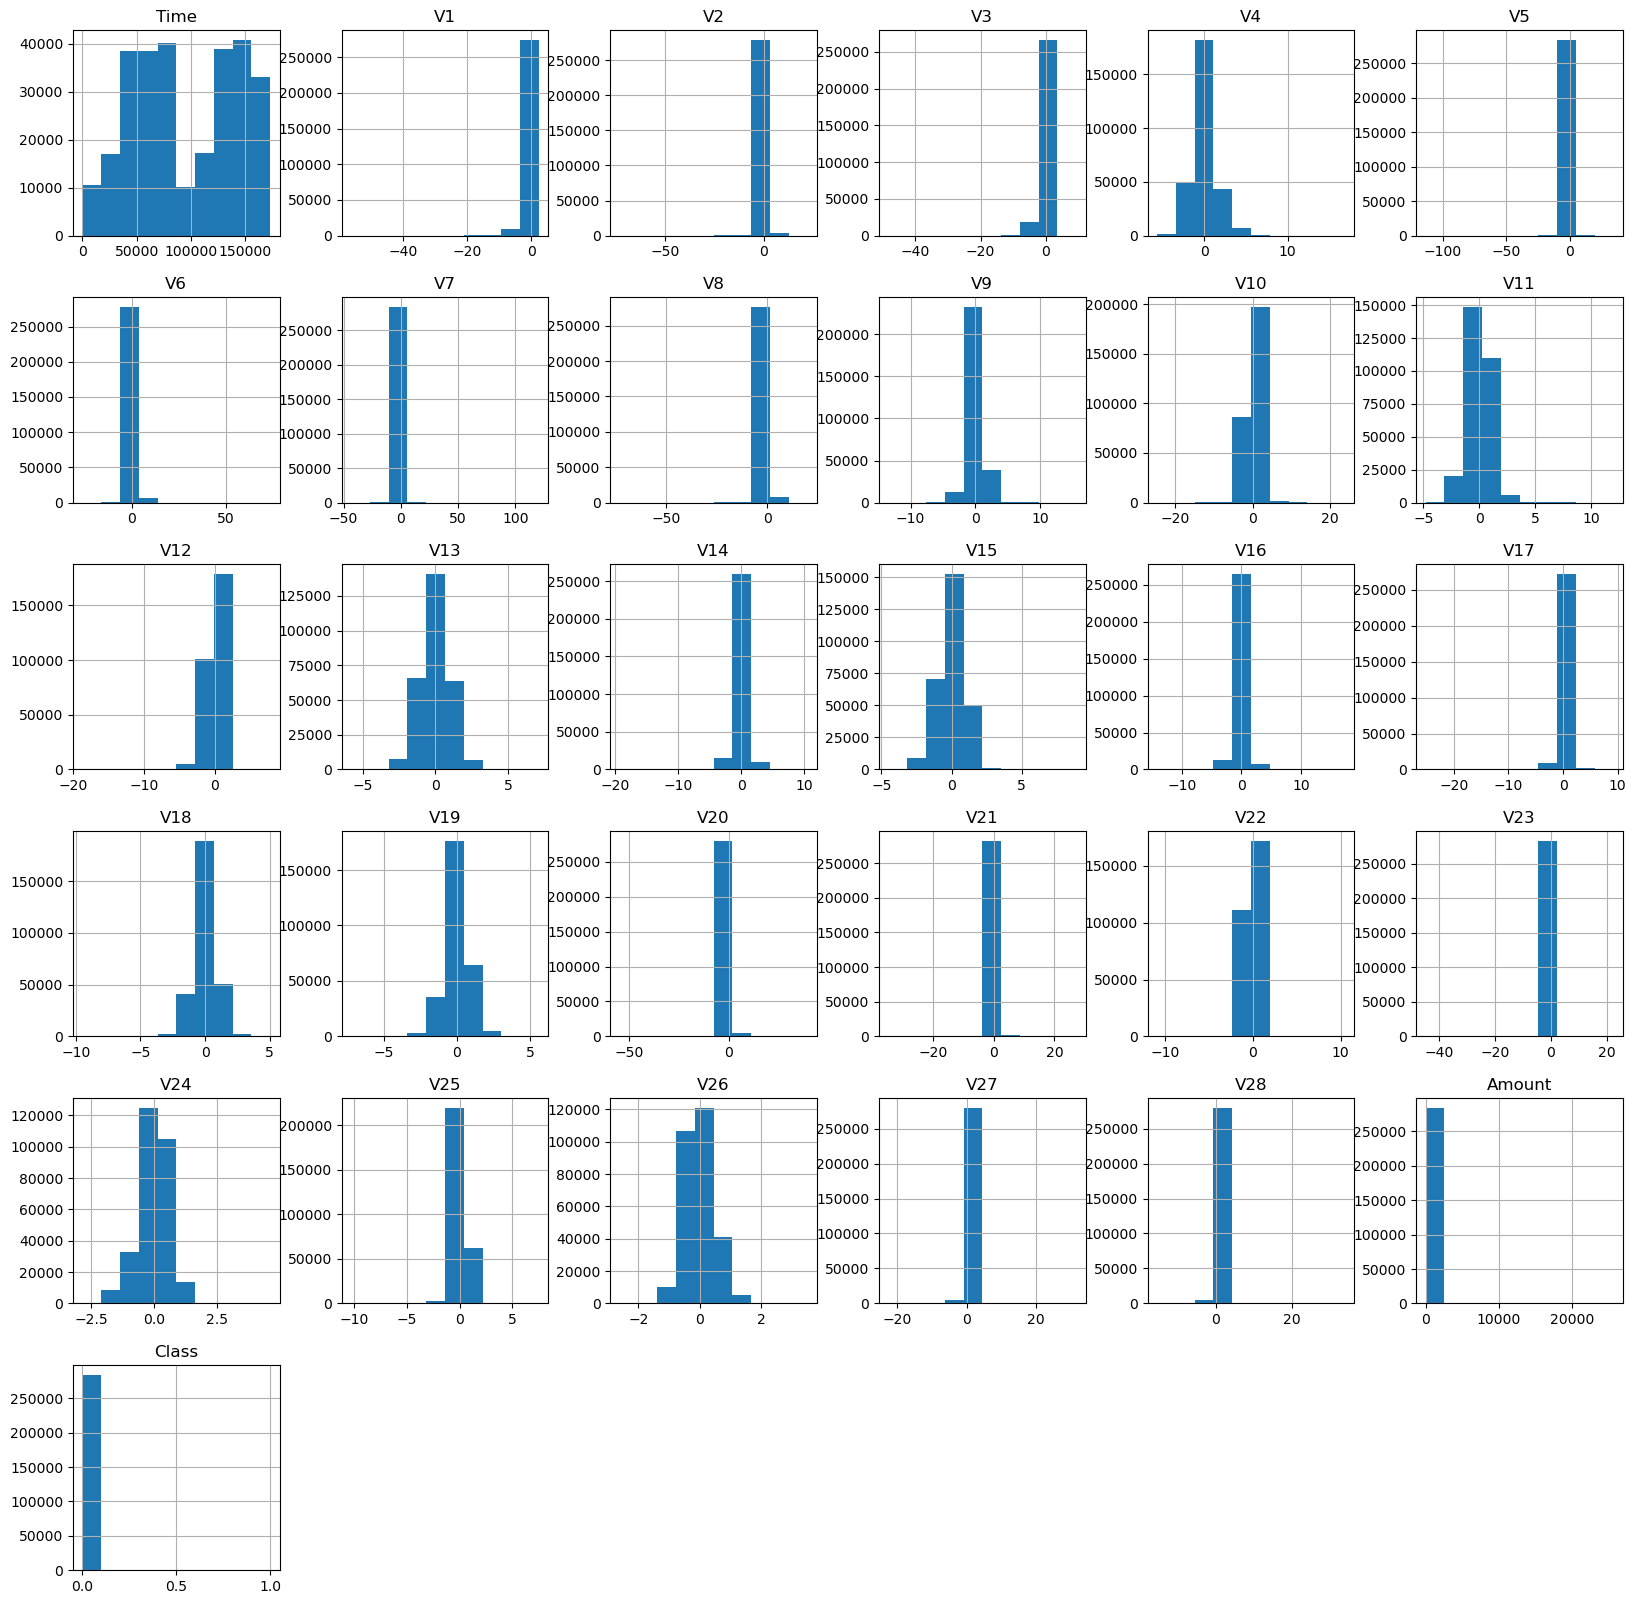

In [10]:
raw_data.hist(figsize = (20,20))
plt.show()

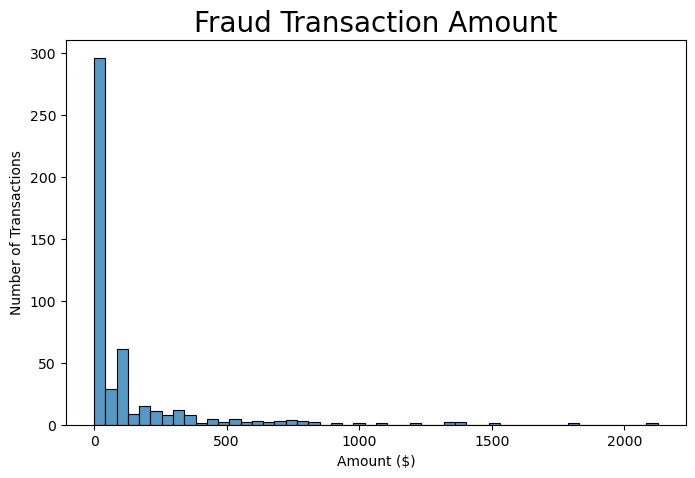

In [11]:
plt.figure(figsize = (8,5))
bins = 50
sns.histplot(data = raw_data, x = raw_data[raw_data['Class'] == 1]['Amount'], bins = bins)
plt.title("Fraud Transaction Amount", fontsize = 20)
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.show()

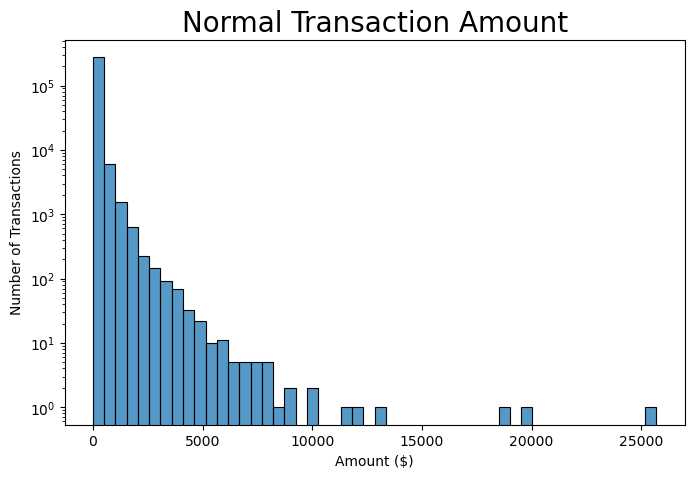

In [12]:
plt.figure(figsize = (8,5))
bins = 50
sns.histplot(data = raw_data, x = raw_data[raw_data['Class'] == 0]['Amount'], bins = bins)
plt.title("Normal Transaction Amount", fontsize = 20)
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

# Sampling

In [13]:
## sample: 20% of data
data = raw_data.sample(frac = 0.2, random_state = 1)

In [14]:
data.shape

(56961, 31)

In [15]:
## checking transaction amount distribution by different classes in sample

data.groupby('Class')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,56874.0,88.645422,254.500273,0.0,5.95,22.175,77.7925,19656.53
1,87.0,157.767126,334.479095,0.0,1.00,17.390,139.1550,2125.87


In [16]:
## separate sample by normal and fraud group

normal = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]

In [17]:
normal.shape

(56874, 31)

In [18]:
fraud.shape

(87, 31)

In [19]:
normal_sample_percentage = len(normal)/float(len(data))
normal_sample_percentage
fraud_sample_percentage = 1- normal_sample_percentage
fraud_sample_percentage

0.0015273608258281612

In sample, 99.85% are normal, while 0.15% are fraud

In [20]:
contamination = float(len(fraud))/len(normal)
contamination

0.0015296972254457222

0.0015: the proportion of outliers in the data set

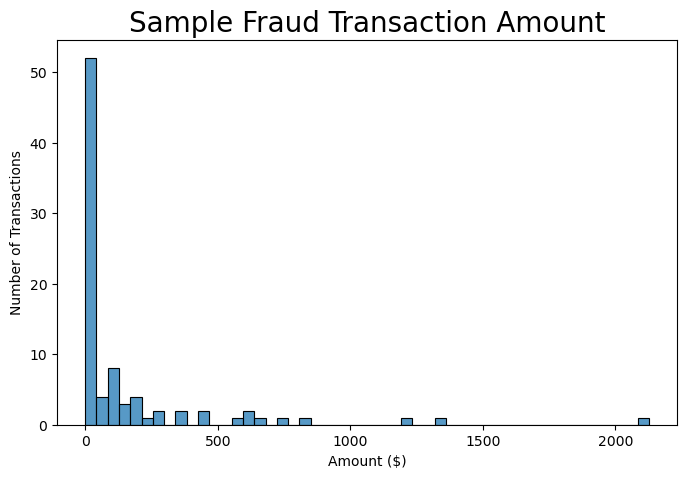

In [21]:
plt.figure(figsize = (8,5))
bins = 50
sns.histplot(data = fraud, x = fraud['Amount'], bins = bins)
plt.title("Sample Fraud Transaction Amount", fontsize = 20)
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.show()

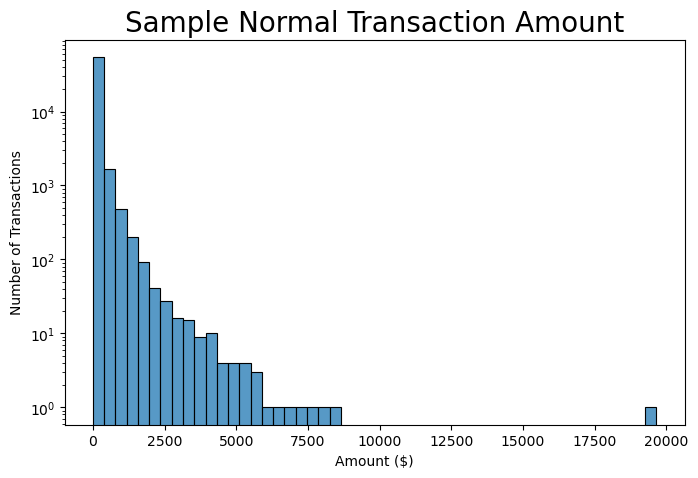

In [22]:
plt.figure(figsize = (8,5))
bins = 50
sns.histplot(data = normal, x = normal['Amount'], bins = bins)
plt.title("Sample Normal Transaction Amount", fontsize = 20)
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [23]:
data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.126152,-0.002514,-0.420766,-0.107783,0.179299,-0.062186,0.081511,-0.039212,-0.005865,...,0.048406,0.145204,0.045802,-0.019265,-0.231639,-0.041420,-0.009705,-0.009189,-0.023460,-0.010111
V1,0.126152,1.000000,0.006548,-0.020191,0.003436,-0.011380,0.009241,0.000206,-0.020061,0.002417,...,-0.024883,0.013323,0.025308,0.006058,0.011492,-0.001348,-0.026102,0.061955,-0.236683,-0.079947
V2,-0.002514,0.006548,1.000000,0.004017,-0.007069,-0.005701,0.008166,0.029169,0.010731,0.007012,...,-0.012765,0.005481,0.017748,-0.004920,0.008923,-0.000592,-0.005623,0.066014,-0.540999,0.071424
V3,-0.420766,-0.020191,0.004017,1.000000,0.010213,-0.013575,0.005303,-0.018311,-0.021678,-0.004847,...,-0.014144,0.011324,0.021602,-0.001823,0.004362,0.002182,-0.007976,0.019071,-0.208024,-0.164419
V4,-0.107783,0.003436,-0.007069,0.010213,1.000000,0.007581,-0.001435,0.004072,0.011713,0.010633,...,0.004409,-0.009634,-0.006432,-0.001571,-0.004863,0.000158,0.018683,-0.025062,0.100100,0.118717
V5,0.179299,-0.011380,-0.005701,-0.013575,0.007581,1.000000,-0.006149,-0.022066,-0.014707,-0.005268,...,-0.014357,0.006242,0.004752,-0.004750,-0.003438,0.003972,0.001638,-0.009950,-0.382143,-0.077511
V6,-0.062186,0.009241,0.008166,0.005303,-0.001435,-0.006149,1.000000,0.004080,0.011144,-0.003740,...,0.016296,0.002638,0.004034,-0.003190,0.002671,0.004079,-0.011457,-0.002441,0.206263,-0.039136
V7,0.081511,0.000206,0.029169,-0.018311,0.004072,-0.022066,0.004080,1.000000,-0.028498,-0.020221,...,-0.003453,0.004444,0.023234,-0.005583,-0.003504,-0.001424,-0.031522,-0.014575,0.393217,-0.144507
V8,-0.039212,-0.020061,0.010731,-0.021678,0.011713,-0.014707,0.011144,-0.028498,1.000000,-0.008844,...,-0.026428,0.006380,0.028666,-0.005255,0.006591,0.009898,-0.008470,0.005348,-0.101420,0.037614
V9,-0.005865,0.002417,0.007012,-0.004847,0.010633,-0.005268,-0.003740,-0.020221,-0.008844,1.000000,...,0.003332,0.001038,0.004832,-0.000553,-0.004717,0.001658,0.008127,-0.017025,-0.043003,-0.078453


<Axes: >

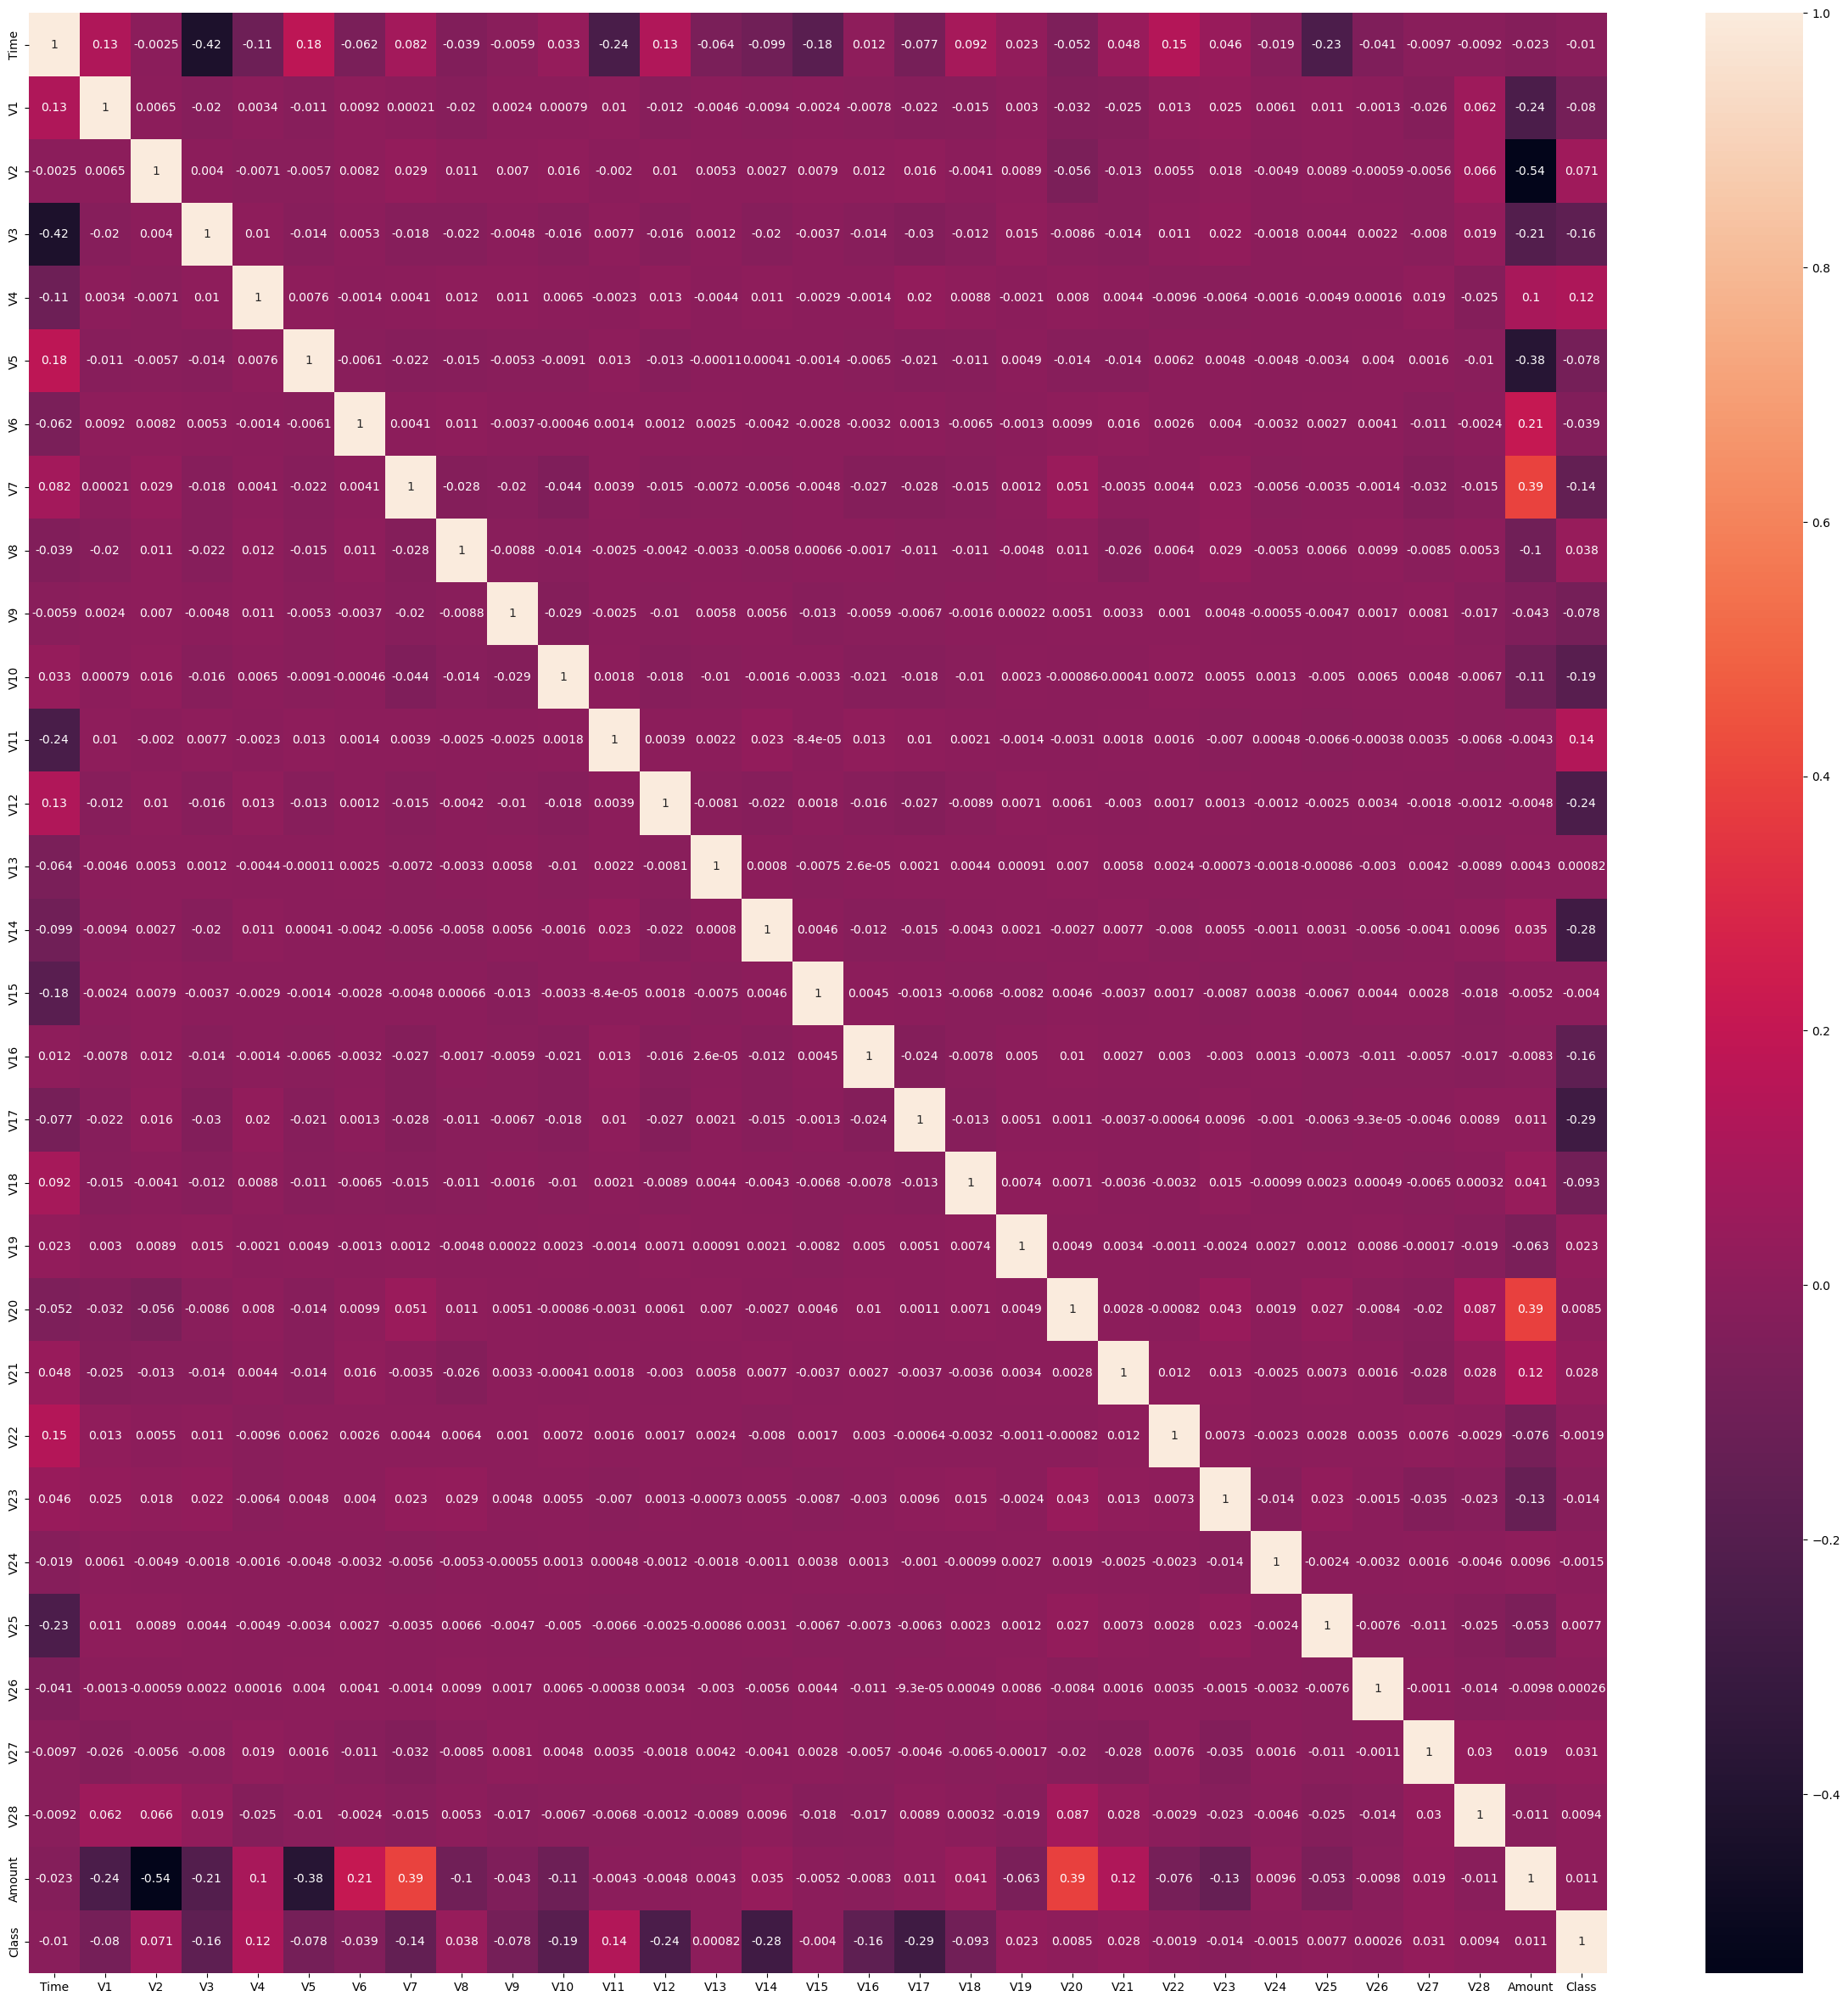

In [24]:
plt.subplots(figsize = (30, 30))
sns.heatmap(data.corr(), annot = True)

In [25]:
## Find out features with higher correlation


data.corr()['Class'].sort_values(key = abs, ascending=False)

Class     1.000000
V17      -0.285679
V14      -0.281431
V12      -0.235308
V10      -0.187799
V16      -0.164756
V3       -0.164419
V7       -0.144507
V11       0.138135
V4        0.118717
V18      -0.093029
V1       -0.079947
V9       -0.078453
V5       -0.077511
V2        0.071424
V6       -0.039136
V8        0.037614
V27       0.030744
V21       0.028337
V19       0.022855
V23      -0.014221
Amount    0.010600
Time     -0.010111
V28       0.009382
V20       0.008521
V25       0.007674
V15      -0.004017
V22      -0.001936
V24      -0.001550
V13       0.000820
V26       0.000265
Name: Class, dtype: float64

Top 5 features with high correlation: V17, V14, V12, V10, V16

In [26]:
X = data.drop('Class', axis = 1)
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.196039,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.009041,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,0.206028,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,0.315823,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.105286,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167241,118564.0,1.807846,0.282700,-1.152681,3.296479,1.504898,2.289534,-0.238113,0.550519,-1.056272,...,-0.325940,0.369140,1.197552,0.014807,-0.935666,0.077198,0.325425,0.004893,-0.072603,10.59
230213,146238.0,2.059529,0.060552,-1.852741,0.216731,0.612468,-0.350598,0.037720,-0.034650,0.341112,...,-0.167555,-0.344438,-0.945853,0.286955,0.085072,-0.255080,0.179711,-0.070405,-0.045728,1.29
275519,166571.0,-0.263581,0.539459,1.151335,0.239111,0.081514,0.406554,0.374843,0.164471,0.186264,...,-0.063213,-0.404868,-0.954422,0.133964,-0.416226,-1.035955,-0.095476,0.080044,0.171671,29.24
148273,89650.0,-0.724439,-0.122047,1.239030,-1.003733,1.170696,1.456970,0.091333,0.397337,0.647886,...,0.236893,0.305360,1.235444,-0.044052,-0.491608,-0.493830,0.754843,0.225042,0.003735,44.91


In [27]:
y = data['Class']
y

169876    0
127467    0
137900    0
21513     0
134700    0
         ..
167241    0
230213    0
275519    0
148273    0
77261     0
Name: Class, Length: 56961, dtype: int64

# Isolation Forest

In [28]:
if_model = IsolationForest(max_samples = len(X),contamination = contamination,random_state = 1)
if_model.fit(X)
if_pred = if_model.predict(X)

/Users/zhanman/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [29]:
if_pred = [1 if i==-1 else 0 for i in if_pred]

In [30]:
if_errors = (if_pred != y).sum()

In [31]:
print(classification_report(y, if_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.27      0.28      0.27        87

    accuracy                           1.00     56961
   macro avg       0.64      0.64      0.64     56961
weighted avg       1.00      1.00      1.00     56961



In [32]:
print('Confusion Matrix: \n', confusion_matrix(y,if_pred))

Confusion Matrix: 
 [[56810    64]
 [   63    24]]


<Axes: >

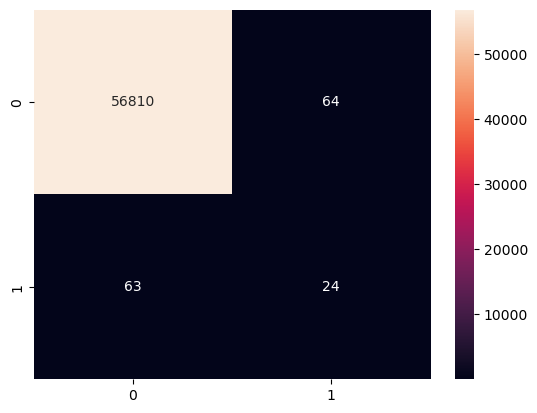

In [33]:
sns.heatmap(confusion_matrix(y,if_pred),annot=True, fmt='d')

In [34]:
print('Accuracy Score: \n', accuracy_score(y,if_pred))

Accuracy Score: 
 0.997770404311722


In [35]:
print('F1 Score: \n', f1_score(y,if_pred))

F1 Score: 
 0.27428571428571424


# Local Outlier Factor

In [36]:
lof_model = LocalOutlierFactor(n_neighbors = 20,contamination = contamination)
lof_pred = lof_model.fit_predict(X)

In [37]:
lof_pred = [1 if i==-1 else 0 for i in lof_pred]

In [38]:
lof_errors = (lof_pred != y).sum()

In [39]:
print(classification_report(y, lof_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.01      0.01      0.01        87

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961



In [40]:
print('Confusion Matrix: \n', confusion_matrix(y,lof_pred))

Confusion Matrix: 
 [[56787    87]
 [   86     1]]


<Axes: >

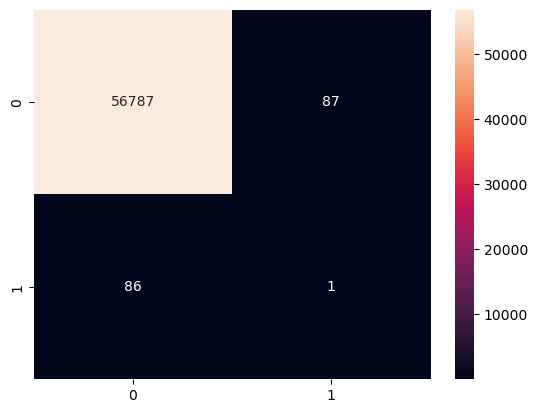

In [41]:
sns.heatmap(confusion_matrix(y,lof_pred),annot=True, fmt='d')

In [42]:
print('Accuracy Score: \n', accuracy_score(y,lof_pred))

Accuracy Score: 
 0.9969628342199048


In [43]:
print('F1 Score: \n', f1_score(y,lof_pred))

F1 Score: 
 0.01142857142857143


# Observations and Conclusions

In [44]:
result = {'# of errors': [if_errors, lof_errors],
         'Accuracy Score': [accuracy_score(y,if_pred), accuracy_score(y,lof_pred)],
         'F1 Score':[round(f1_score(y,if_pred),2),round(f1_score(y,lof_pred),2)]}

In [45]:
result

{'# of errors': [127, 173],
 'Accuracy Score': [0.997770404311722, 0.9969628342199048],
 'F1 Score': [0.27, 0.01]}

In [46]:
result_df = pd.DataFrame(result, index=['Isolation Forest',
                               'Local Outlier Factor'])

In [47]:
result_df

,# of errors,Accuracy Score,F1 Score
Isolation Forest,127,0.997770,0.27
Local Outlier Factor,173,0.996963,0.01


Conclusions:

1. Isolation Forest detected 127 errors versus Local Outlier Factor detecting 173 errors
2. The accuracy scorce for Isolation Forest is 99.8% versus 99.7% for Local Outlier Factor
3. Overall, Isolation Forest performs better